1. Data Description

There are two data files provided which consist of player.csv and sessions.csv. The player.csv file contains data on experience, subscribe, hashedEmail, played_hours, name, gender, and age. While the sessions.csv contains hashed email, start time, end time, original start time, and original end time. We will be using the player.csv for this project.

Here are some details for the player.csv data:
- experience variable is categorized as Pro, Veteran, Amateur, or Regular.
- subscribe variable indicates whether the player is subscribed (TRUE) or not (FALSE).
- hashedEmail refers to the player's email in a hashed format.
- played_hours is measured in hours.
- name represents the player's first name.
- gender includes three categories: Male, Female, and Non-binary.
- age is recorded in years.

2. Questions

    In this project I will be answering the broad question of:

We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting. efforts

    And the specific question of:

Can an amateur player's age be used to predict their total accumulated playing hours?

Here is my hypothesis:

- The lower the player’s age the higher their total accumulated playing.

Plan on data wrangling:
- Read the data player.csv and filter out such that amateur players are the ones remaining.
- I will select the data that we are using which consists of played_hours and experience.
- I will handle the missing data.
- For the predicting part, I will calculate the Root Mean Squared Error (RMSE) between KNN and linear regression. Since, my hypothesis suggests a linear relation between the player’s age and their total accumulated playing, I expect linear regression to perform better than KNN.

3. Exploratory Data Analysis and Visualization

Below I have done the necessary data wrangling for my project with the same steps as the one I have stated in the part 2. I have also compute the data finding the average and also produce some plot that would help understand the data.

Mean :
- We got an average age of 20.52 in years and an average played hours of 5.85 hours.

Distribution :
- From the histogram of the player age we found that most player are between the age of 15 and 25 where most of it is at age 17.
- From the histogram we can conclude that most of the player spent 0 hours in the game
- The scatter plot of the correlation of age of players to time spent played indicates that younger players spent more time in the game than the older players.

4. Methods and Plan
- Why is this method appropriate?

Since the age and the total played hours seems to have a linear relationship linear regression is better than kkn and also the data is trying to predict a numercial variable which suggest linear regression being the better choice.
- Which assumptions are required, if any, to apply the method selected?

For the linear regression to be used we need to assume the linearity between age and total hours played.

- What are the potential limitations or weaknesses of the method selected?

The weakness for linear regression is that we need to assume the linearity between the Age and total played hours. 

- How are you going to compare and select the model?

In order to pick which model to use we can use the Root Mean Squared Error (RMSE) and Root Mean Squared Prediction Error (RMPSE).
1. RMSE this indicates how well our model can fit our data.
2. RMPSE this indicates how well our model generalizes to future data.

- How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?

For this I will be dividing the data 70% for the training and 30% for the testing. I will be using the cross validation to ensure that the data is not to overfitted to the training data. 

In [65]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)
source("cleanup.R")

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [66]:
#calculating mean
mean <- read_csv("data/players.csv")|>
        select(Age, played_hours) |>
        summarise(
        Mean_Age = mean(Age, na.rm = TRUE),
        Mean_Played_Hours = mean(played_hours, na.rm = TRUE)
        )

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [67]:
tibble(mean)

Mean_Age,Mean_Played_Hours
<dbl>,<dbl>
20.52062,5.845918


In [68]:
#Read the data
players <- read_csv("data/players.csv") |>
            filter(experience == "Amateur") |> select(Age, played_hours)


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [69]:
tibble(players)

Age,played_hours
<dbl>,<dbl>
21,0.7
17,0.0
21,0.0
⋮,⋮
17,0.0
17,0.0
17,2.3


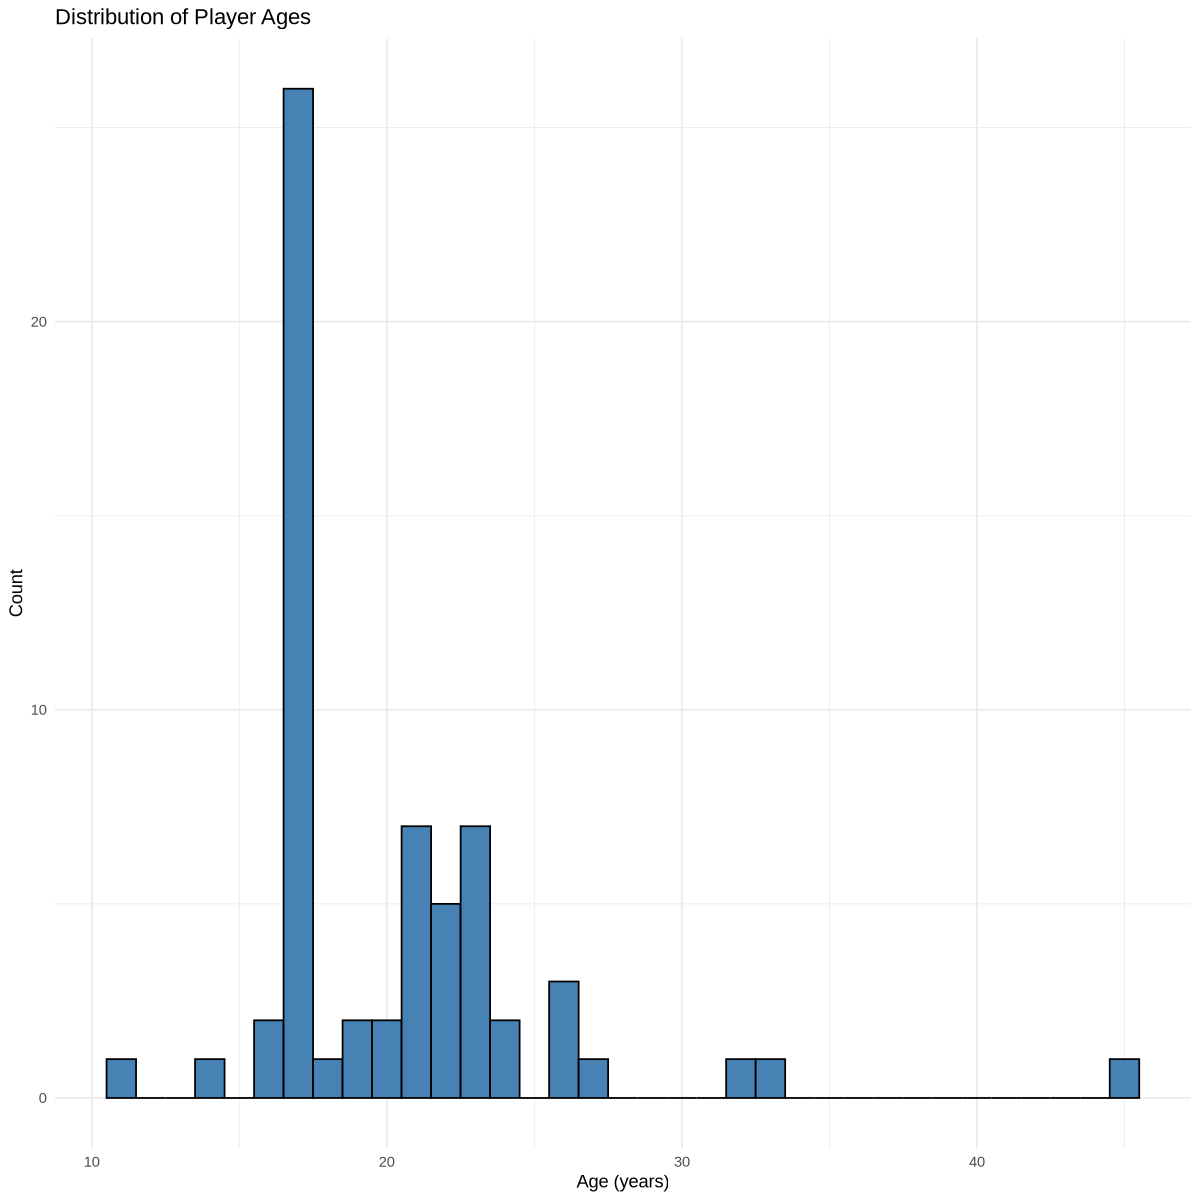

In [70]:
#Histogram for Age
options(repr.plot.width = 10, repr.plot.height = 10) 
ggplot(players, aes(x = Age)) +
  geom_histogram(binwidth = 1, fill = "steelblue", color = "black") +
  labs(title = "Distribution of Player Ages",
       x = "Age (years)",
       y = "Count") +
  theme_minimal()

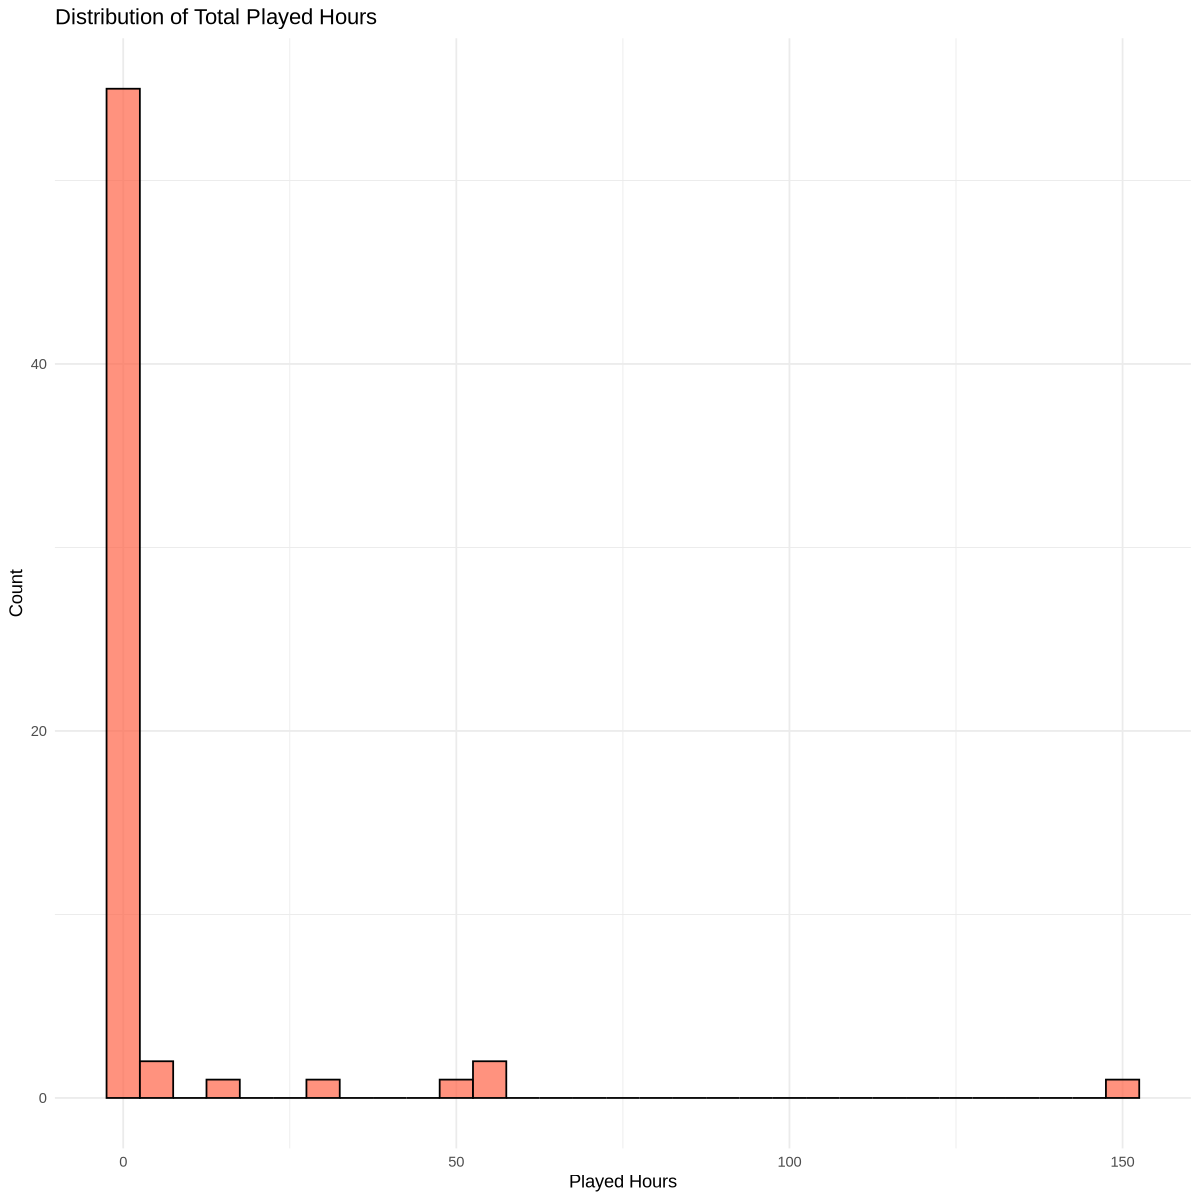

In [71]:
#Histogram for played hours
options(repr.plot.width = 10, repr.plot.height = 10) 
ggplot(players, aes(x = played_hours)) +
  geom_histogram(binwidth = 5, fill = "tomato", color = "black", alpha = 0.7) +
  labs(title = "Distribution of Total Played Hours",
       x = "Played Hours",
       y = "Count") +
  theme_minimal()

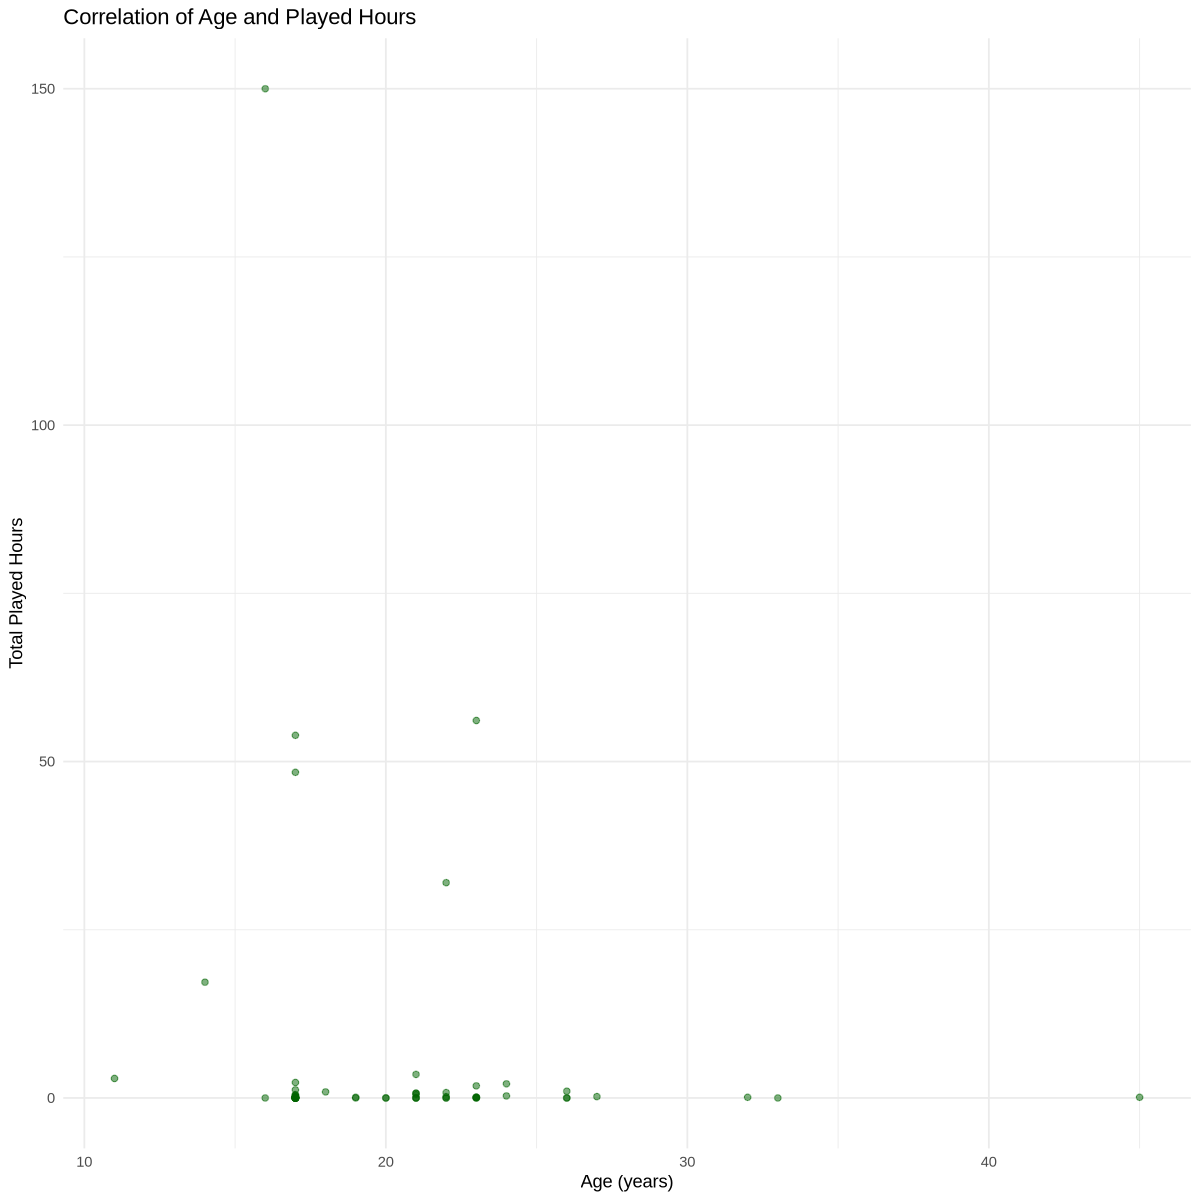

In [73]:
#Histogram of Age vs Played Hours
ggplot(players, aes(x = Age, y = played_hours)) +
  geom_point(alpha = 0.5, color = "darkgreen") +
  labs(title = "Correlation of Age and Played Hours",
       x = "Age (years)",
       y = "Total Played Hours") +
  theme_minimal()